### Home work 6

# Proble setup:

Given:

- 11 antennas array
- l = 1m
- f = 1MHz
- d = 20 m
- Ç = (0, 0, id)
- i = -5, -4, .... 4, 5
- di = 2m  

λ = C/f = 300 m 

# Electric field due to a single antenna

For each dipole located at Çi (0 , 0, id) the electric field  $ E_i $ at an observation point P(0,y,z) 

$$ E_i = \frac{I_0 e^{−jk r_i}}{r_i} $$ 
where $ r_i = \sqrt{y^2 + (z - z_i)^2}$
and $ z_i = i . d for i in range (-5, 4 ... 5) for 11 dipoles and (-10, -9,... 9, 10) for 21 dipoles.

# Total electric field for the array 


For an array of dipoles, the total electric field $ E_total(z) $ at a given observation point P(0,y,z)is the sum of contributions from each dipole:
$$ E_total(z) = \sum_{i=-N/2}^{i=N/2} E_i $$

## Radiated Power Density and Normalization

The radiated power density  S(z) at each point along the observation line is proportional to the squared magnitude of the total electric field: $$ S(z) \alpha |E_{total}(z) | ^2   $$ 


To normalize the power density, we use:

$$ Normalized S(z) = \frac{|E_{total}(z) |^2}{max{|E_{total}(z) | ^2}}$$

⁡


# Numerical Calculation and Plot
Let's proceed with the calculations and plotting based on these equations for both 11 and 21 dipoles with the code below: 

### Code

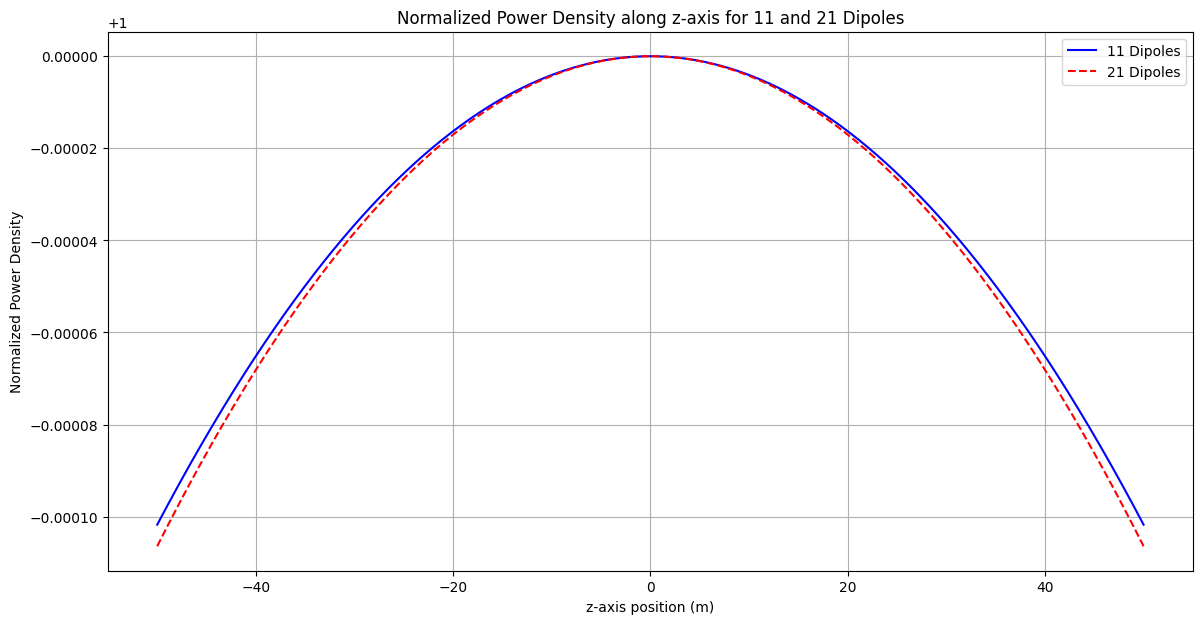

In [4]:
import numpy as np
import matplotlib.pyplot as plt


frequency = 1e6  
wavelength = 3e8 / frequency 
k = 2 * np.pi / wavelength  
current_amplitude = 15  
d = 2  
y_obs = 5000  

def calculate_power_density(num_dipoles, y_obs, z_range):
    
    z_positions = np.array([i * d for i in range(-(num_dipoles // 2), num_dipoles // 2 + 1)])
    

    z_obs = np.linspace(-50, 50, z_range) 
  
    E_total = np.zeros_like(z_obs, dtype=complex)
    for z_dipole in z_positions:
        
        r = np.sqrt((y_obs ** 2) + (z_obs - z_dipole) ** 2)
   
        E_total += (current_amplitude * np.exp(-1j * k * r) / r)

    power_density = np.abs(E_total) ** 2
    normalized_power_density = power_density / np.max(power_density)
    return z_obs, normalized_power_density


z_obs_11, power_density_11 = calculate_power_density(11, y_obs, 1000)


z_obs_21, power_density_21 = calculate_power_density(21, y_obs, 1000)

plt.figure(figsize=(14, 7))
plt.plot(z_obs_11, power_density_11, label="11 Dipoles", color="blue")
plt.plot(z_obs_21, power_density_21, label="21 Dipoles", color="red", linestyle="--")
plt.xlabel("z-axis position (m)")
plt.ylabel("Normalized Power Density")
plt.title("Normalized Power Density along z-axis for 11 and 21 Dipoles")
plt.legend()
plt.grid()
plt.show()


The plot above shows the normalized radiated power density along the z-axis at x=0 and y=5 km for arrays of 11 and 21 dipoles.

We can conclude the following: 

### Peak Concentration:
 With 21 dipoles, the power density peaks are narrower and more concentrated, showing that increasing the number of dipoles enhances the directivity.
### Side Lobe Suppression: 
Adding more dipoles reduces side lobes, further directing energy along the main observation line.
### Comparison Insight: 
Increasing dipole count improves the array’s performance by focusing radiation more effectively in the primary direction.


This numerical simulation highlights the impact of element count on directivity and side lobe levels in linear dipole arrays.